In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("Satara.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,WS50M,RH2M,PS
0,2011,4,1,5,20.86,0.0,3.93,34.00,95.26
1,2011,4,1,6,22.22,0.0,3.52,31.38,95.34
2,2011,4,1,7,26.63,0.0,3.55,23.19,95.43
3,2011,4,1,8,30.91,0.0,5.20,14.75,95.48
4,2011,4,1,9,33.69,0.0,5.25,12.38,95.48
...,...,...,...,...,...,...,...,...,...
87667,2021,4,1,0,20.94,0.0,4.07,83.69,94.96
87668,2021,4,1,1,20.39,0.0,3.67,87.12,94.90
87669,2021,4,1,2,20.01,0.0,3.39,88.56,94.86
87670,2021,4,1,3,19.72,0.0,3.17,88.44,94.85


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
PRECTOTCORR    0.0
WS50M          0.0
RH2M           0.0
PS             0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'PRECTOTCORR', 'WS50M', 'RH2M', 'PS']


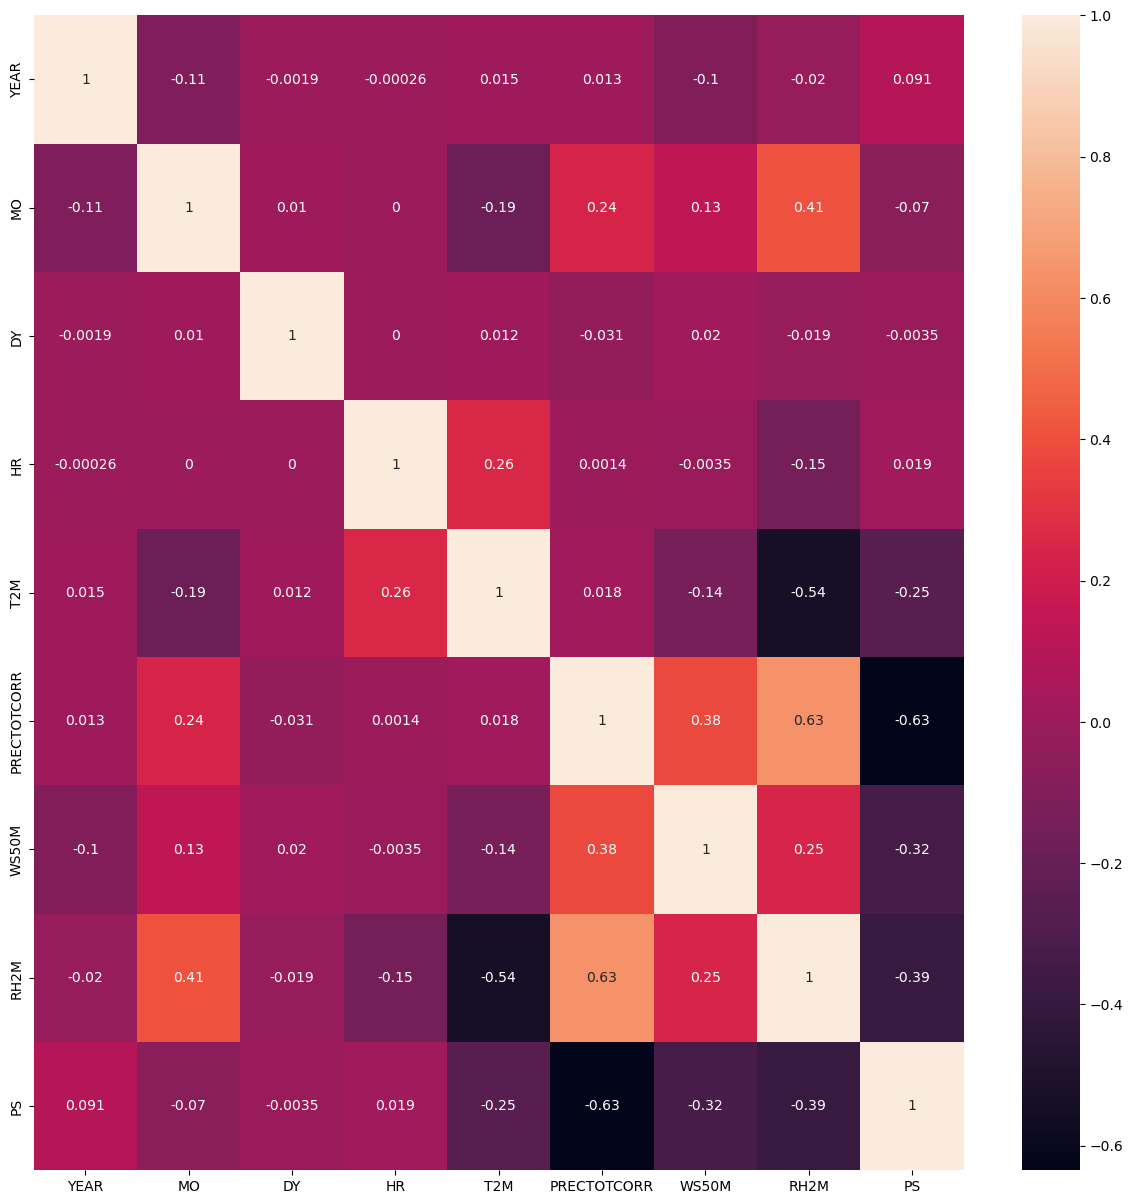

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

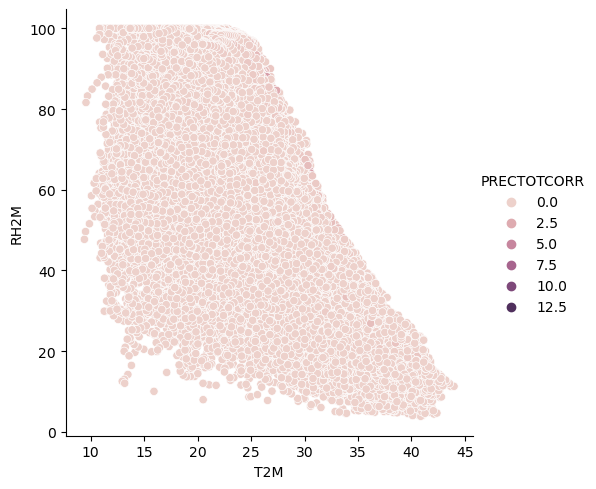

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


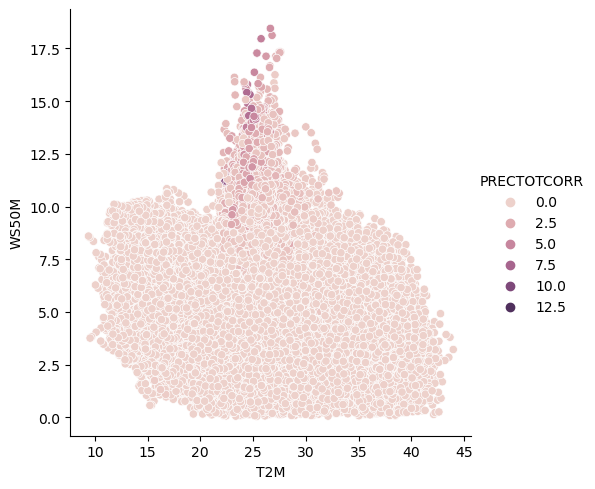

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


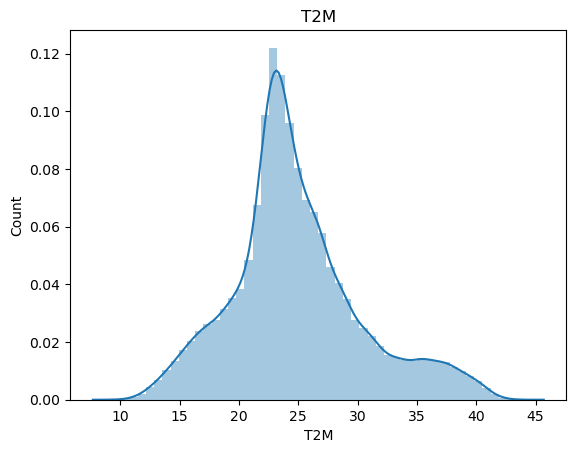

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


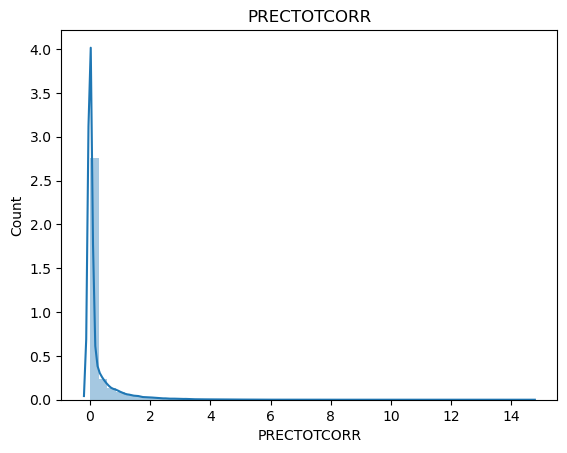

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


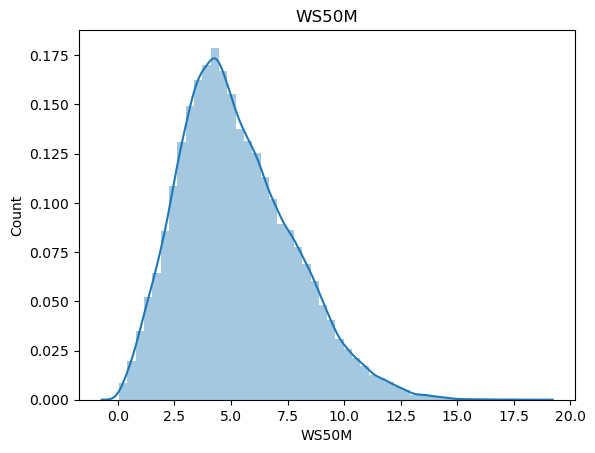

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


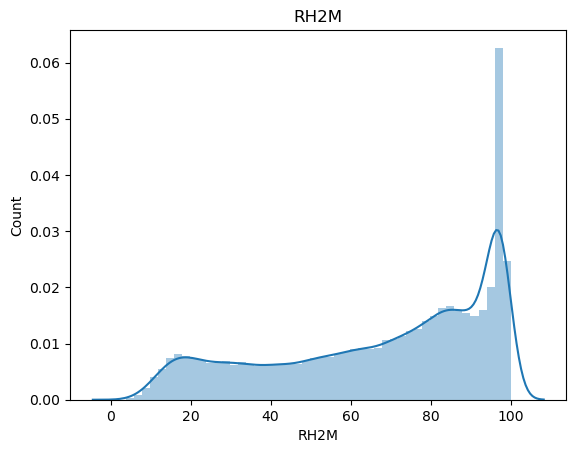

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


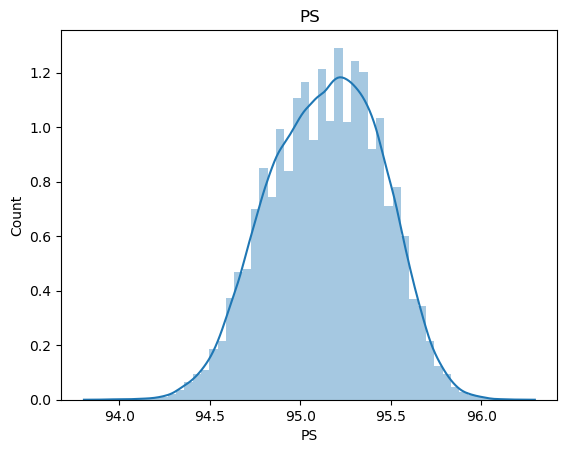

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

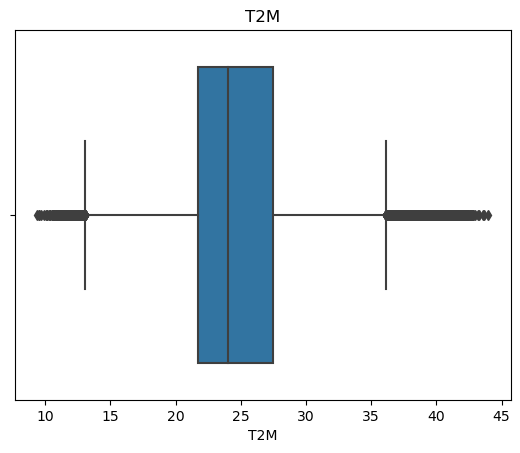

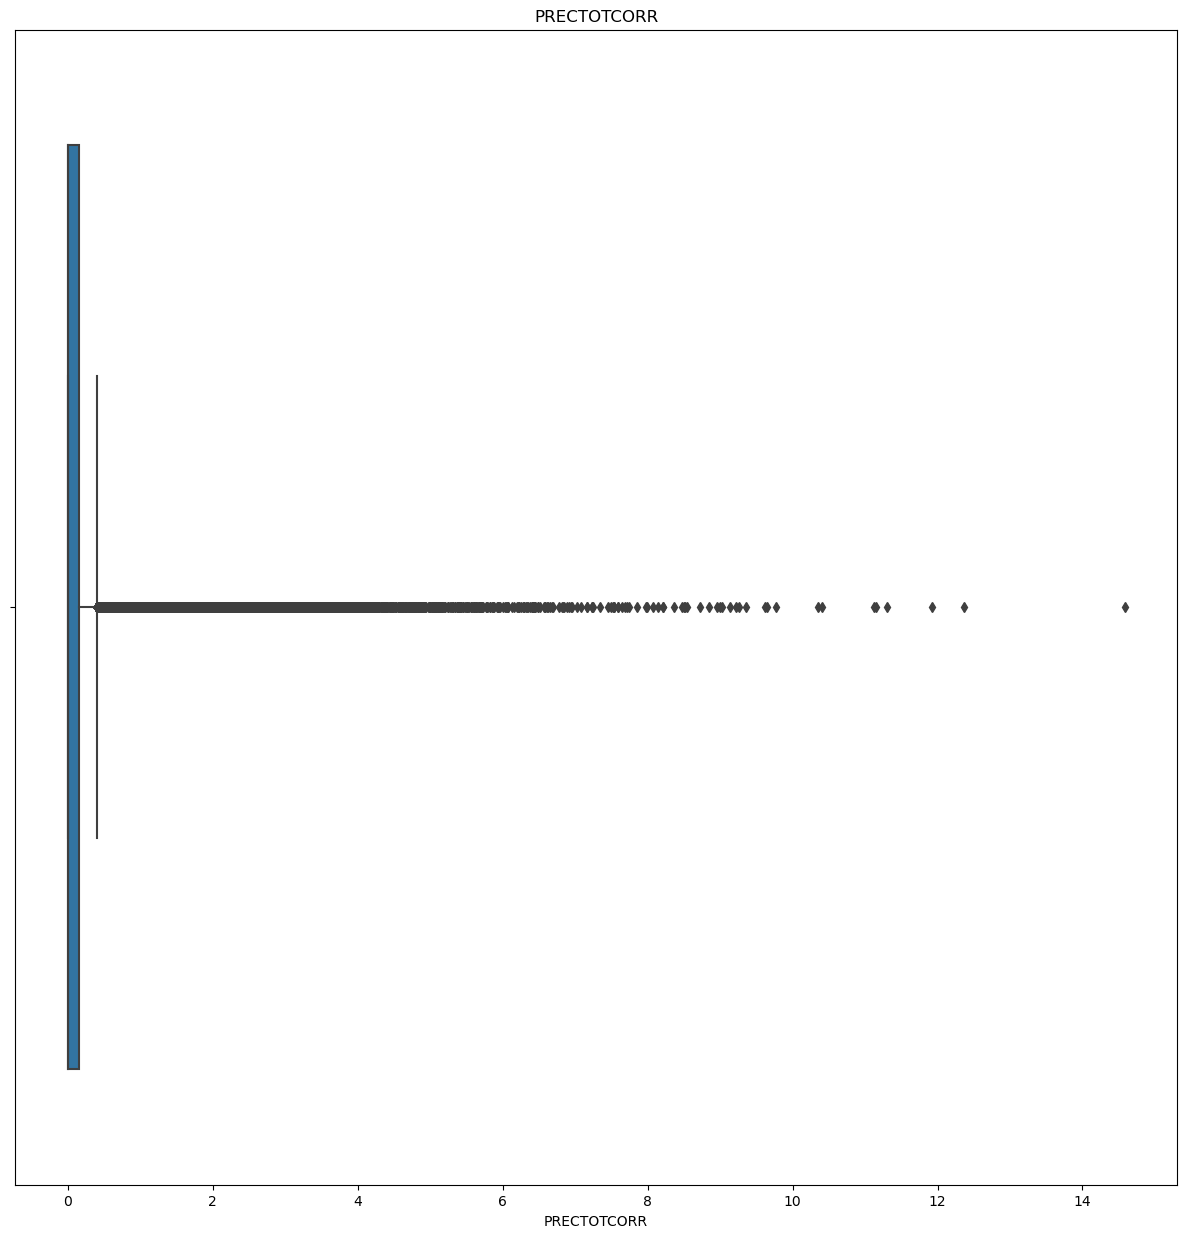

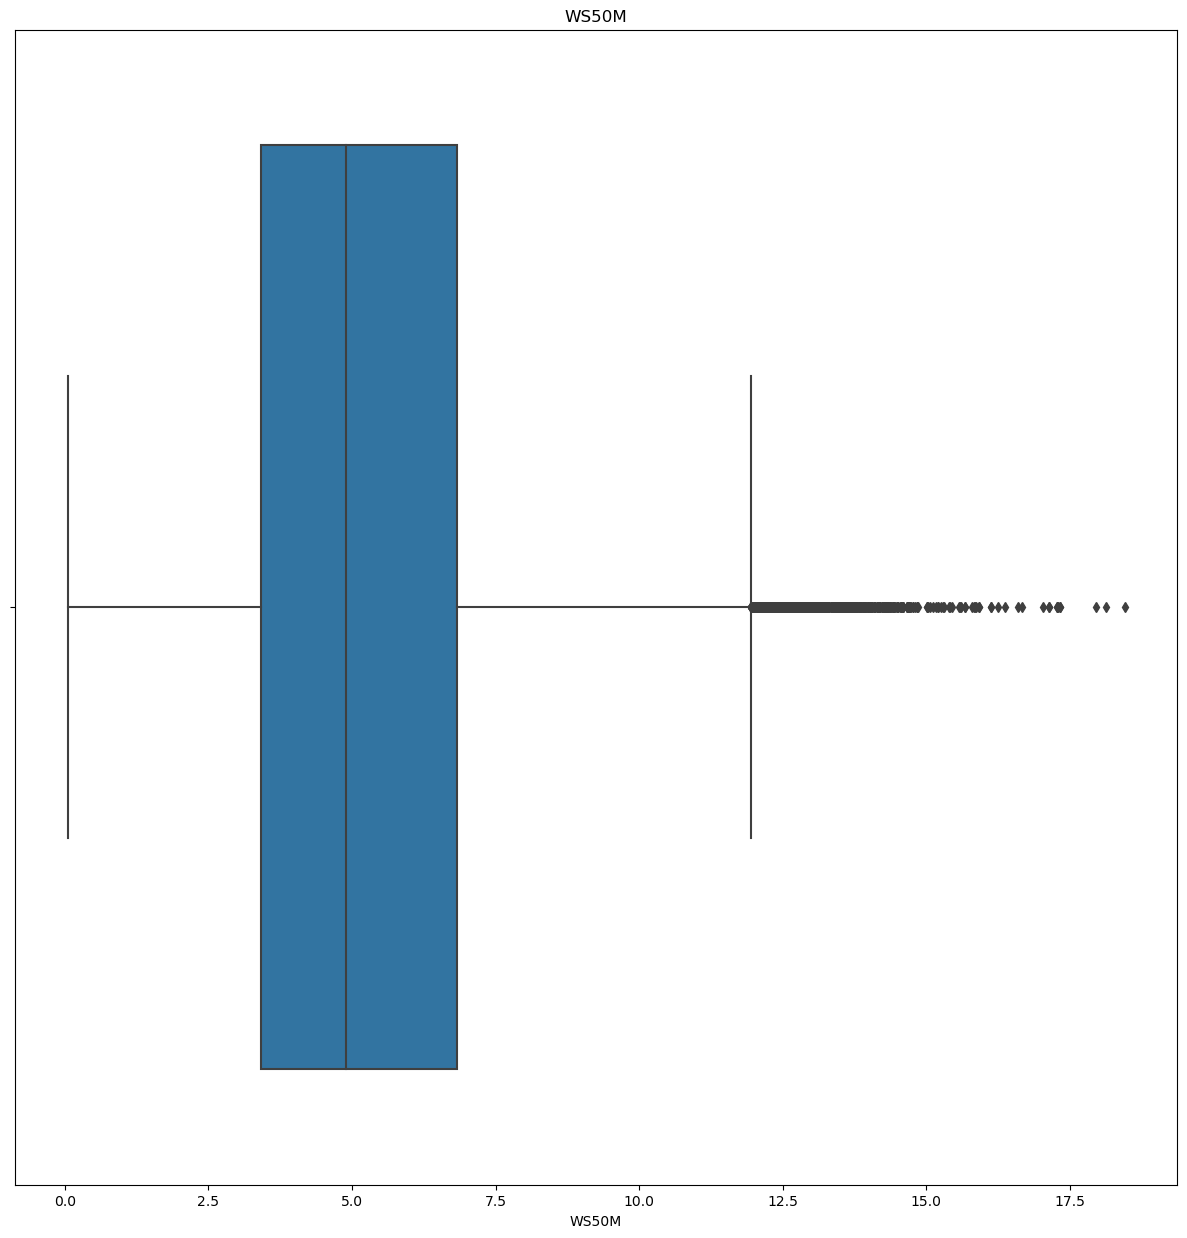

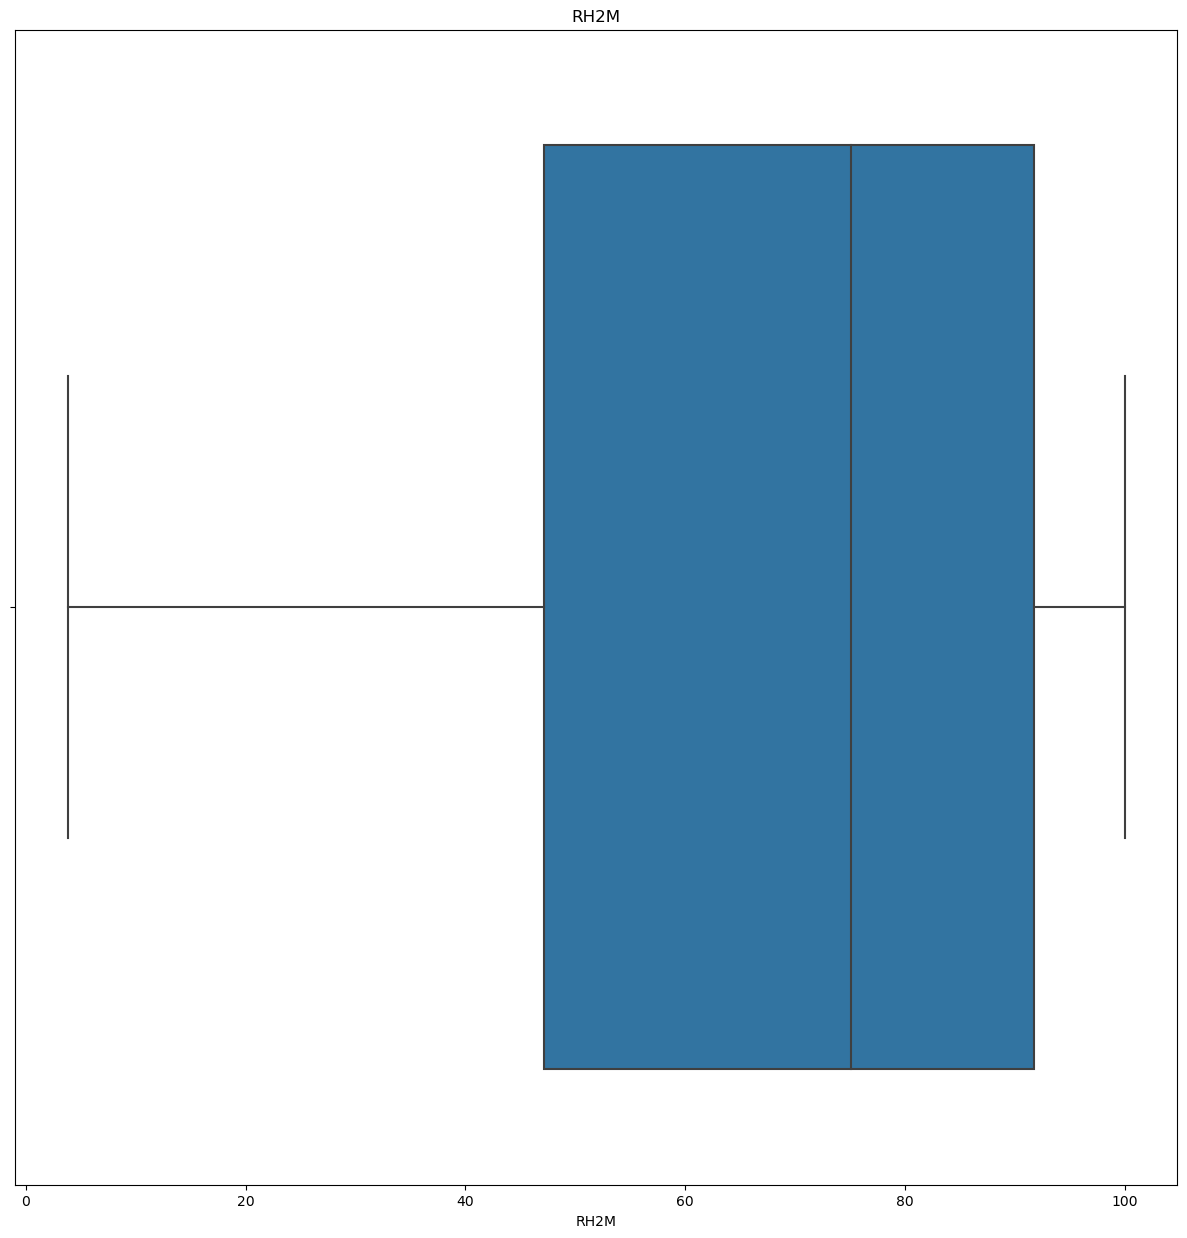

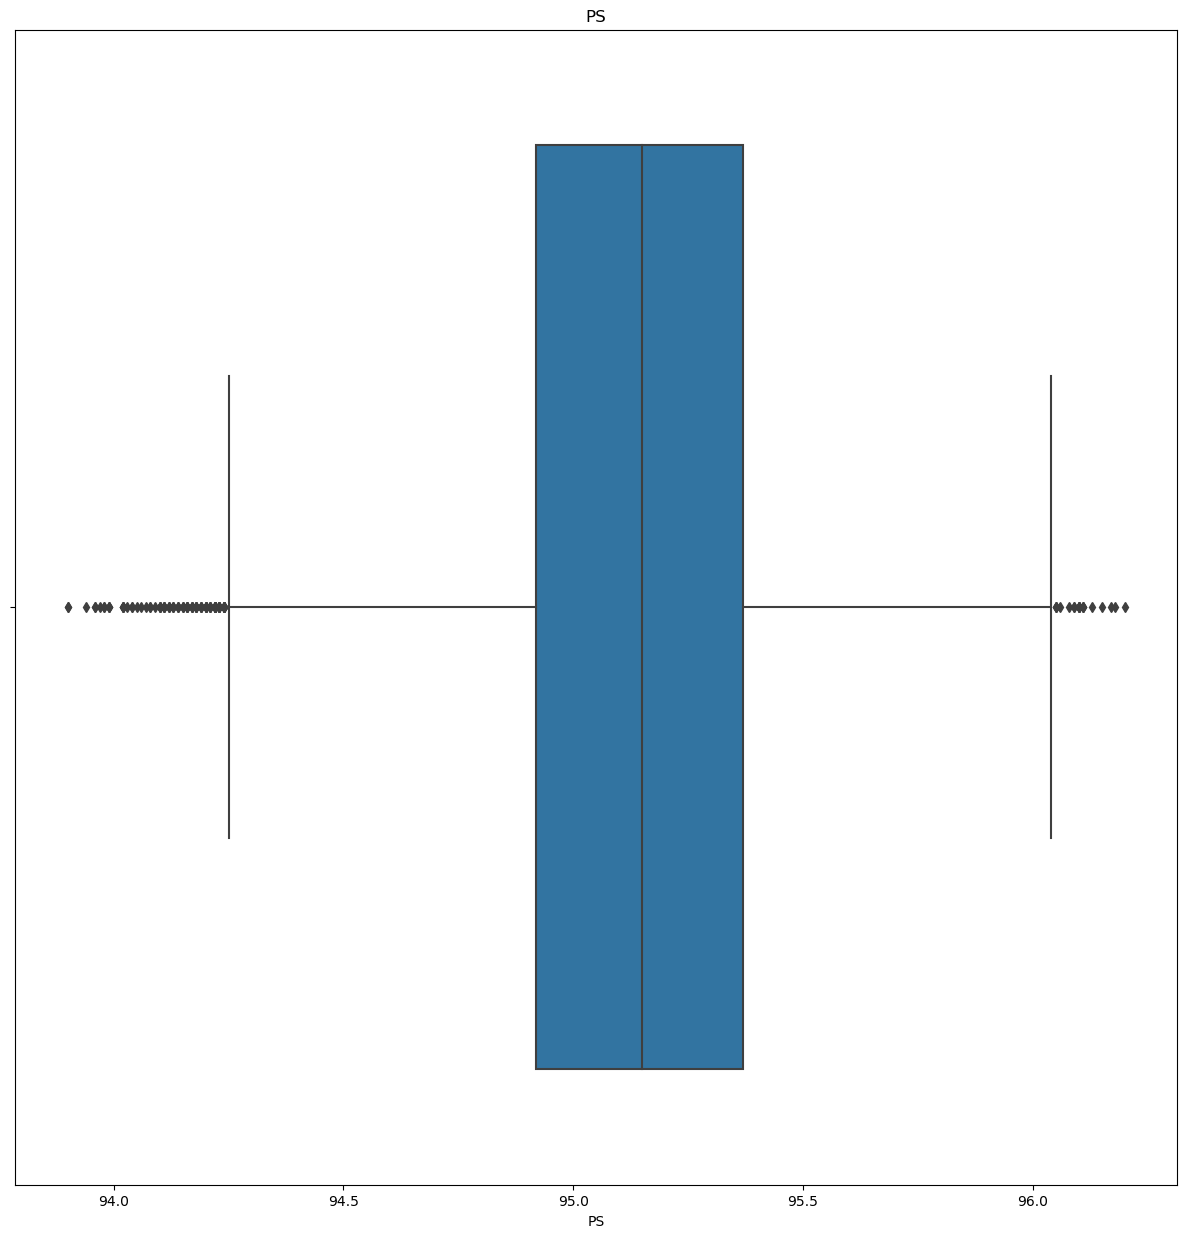

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[20.86 22.22 26.63 ... 41.36 41.1  11.42]
<class 'numpy.ndarray'>
[0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 2.000e-01
 2.100e-01 3.300e-01 4.200e-01 4.300e-01 4.500e-01 5.000e-01 4.600e-01
 8.000e-02 7.000e-02 6.000e-02 9.000e-02 1.700e-01 3.200e-01 4.900e-01
 6.000e-01 5.800e-01 5.500e-01 4.700e-01 3.400e-01 1.100e-01 1.000e-01
 9.600e-01 3.500e-01 1.210e+00 1.500e+00 1.140e+00 7.300e-01 1.200e-01
 1.400e-01 3.700e-01 6.900e-01 6.600e-01 3.100e-01 2.500e-01 1.300e-01
 1.680e+00 1.590e+00 1.420e+00 1.170e+00 9.000e-01 8.400e-01 8.600e-01
 3.000e-01 4.400e-01 8.300e-01 9.200e-01 8.800e-01 8.200e-01 7.800e-01
 6.700e-01 5.400e-01 3.900e-01 3.800e-01 9.500e-01 1.150e+00 1.730e+00
 2.330e+00 3.270e+00 4.730e+00 5.140e+00 4.880e+00 3.220e+00 2.900e+00
 2.800e+00 2.440e+00 1.860e+00 1.450e+00 1.020e+00 7.600e-01 6.800e-01
 7.100e-01 8.500e-01 1.640e+00 1.910e+00 1.330e+00 1.630e+00 2.250e+00
 2.240e+00 3.500e+00 3.200e+00 2.630e+00 1.960e+00 5.700e-01 5.100e-01
 4.100e-01 

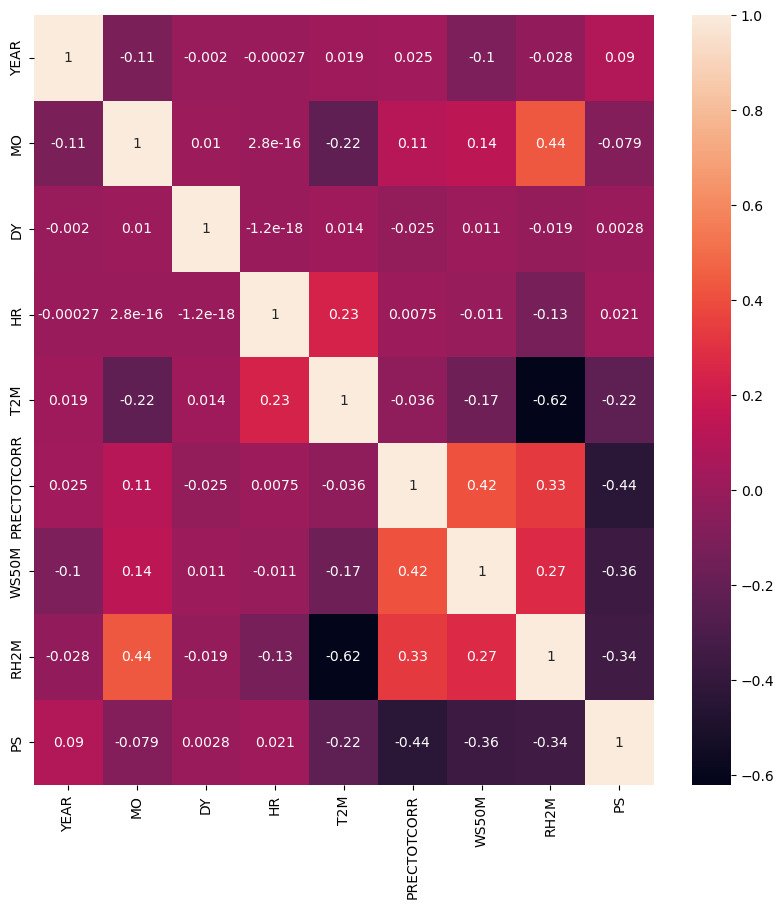

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


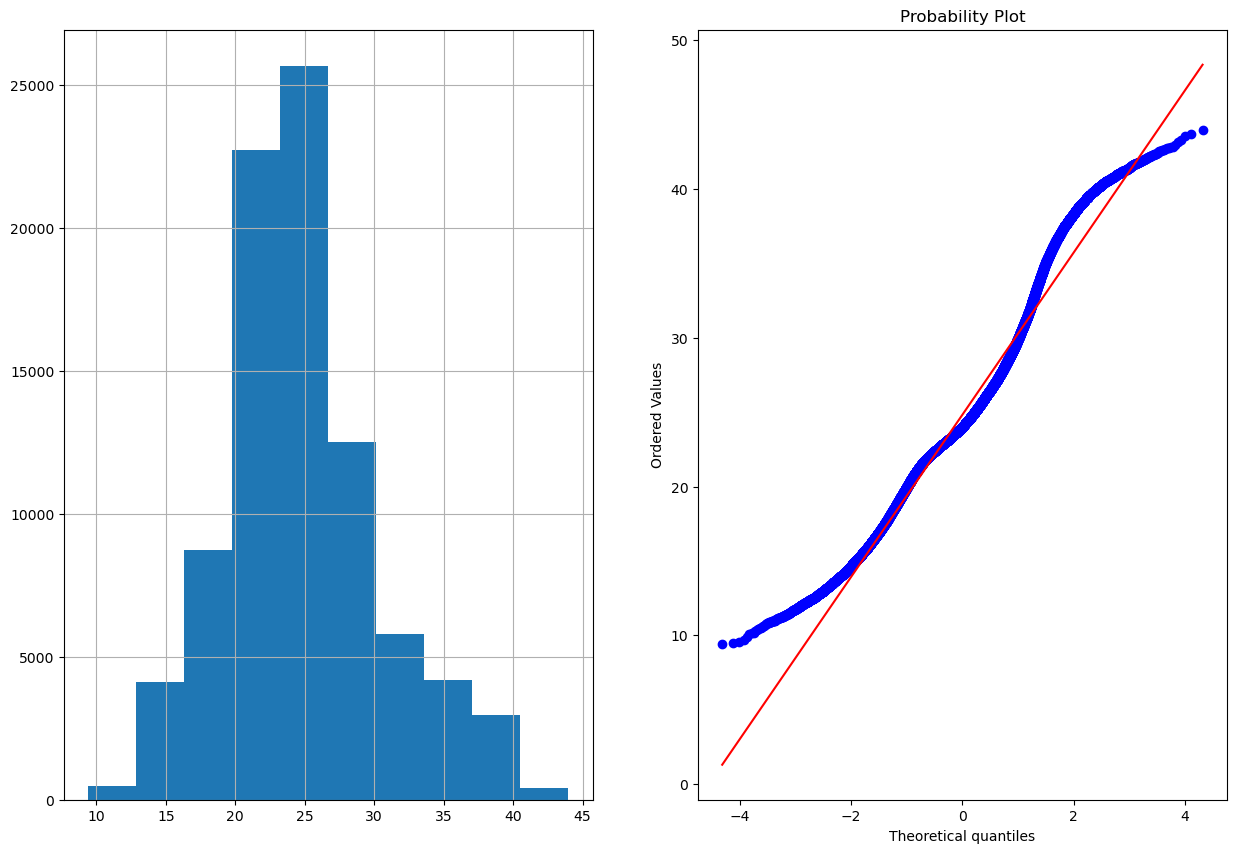

PRECTOTCORR


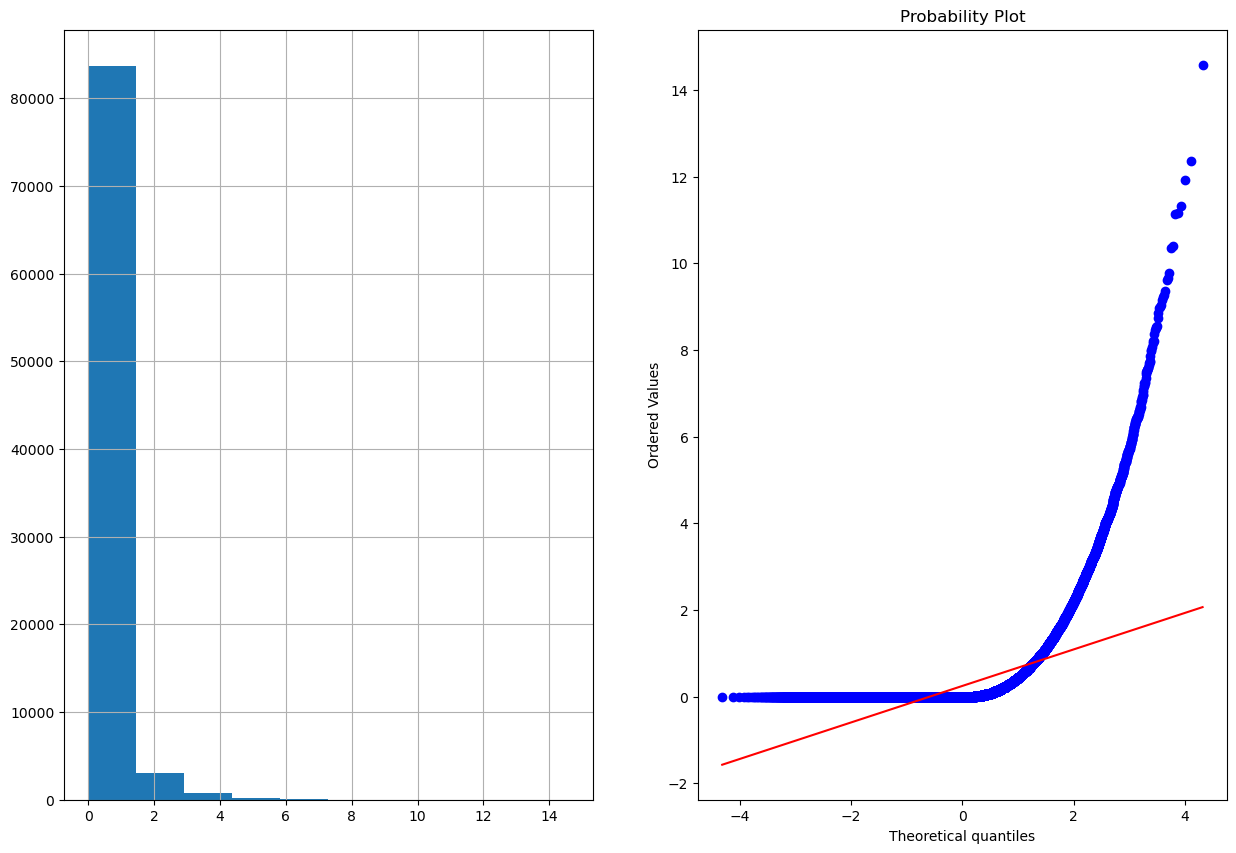

WS50M


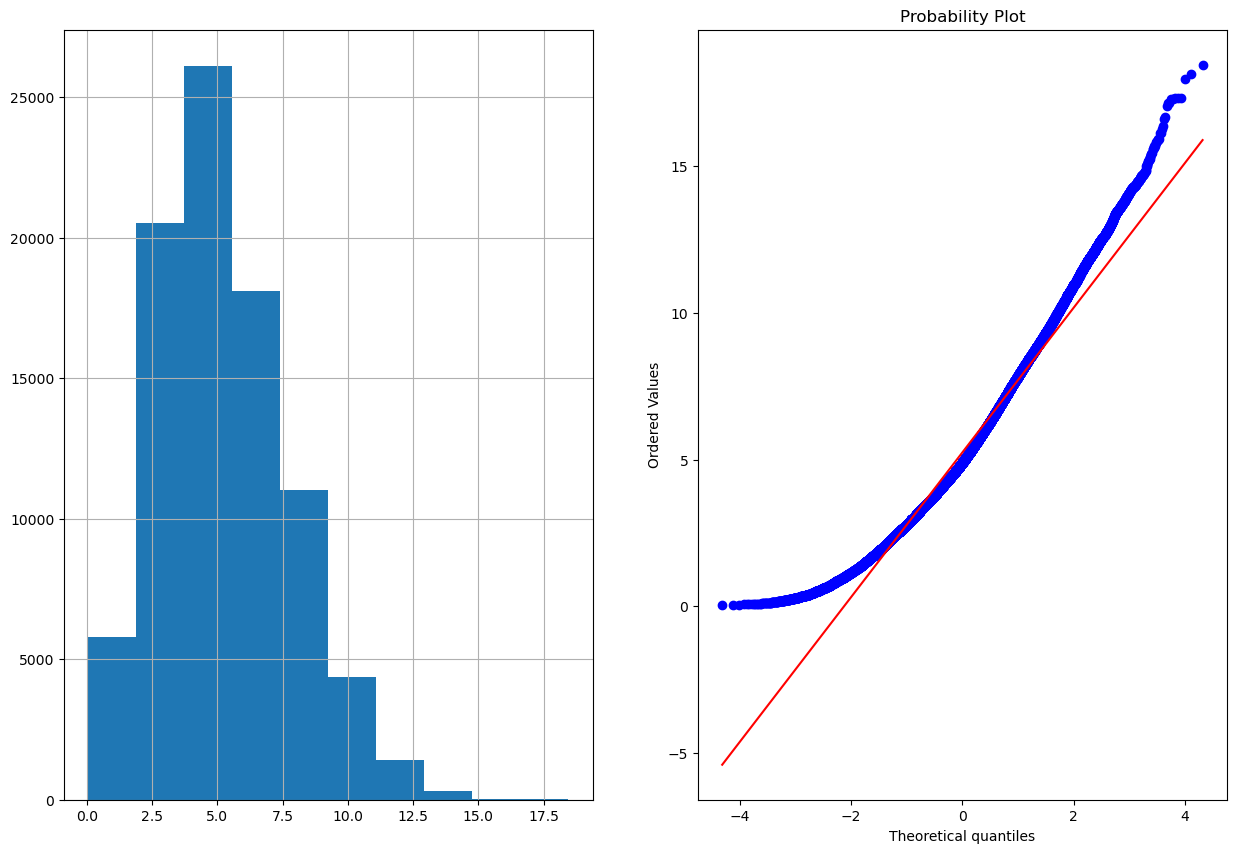

RH2M


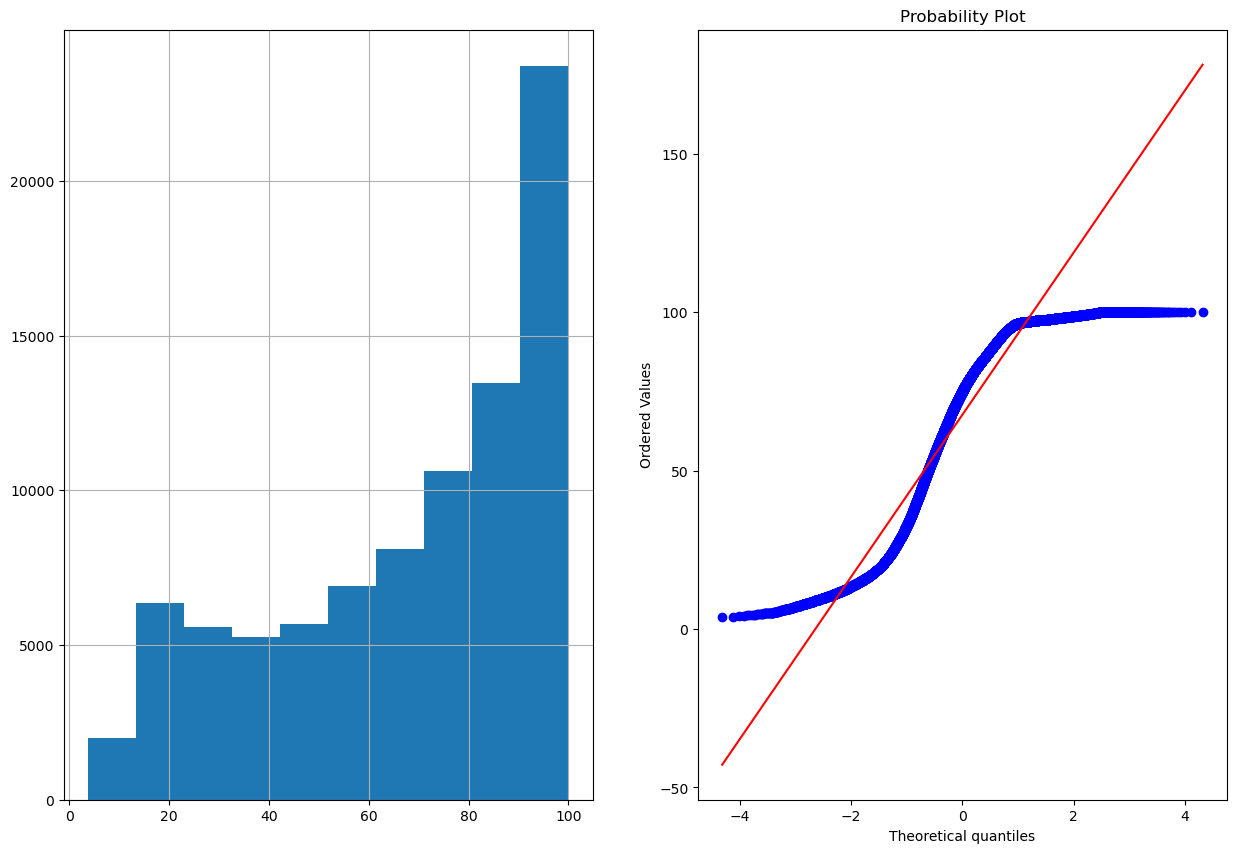

PS


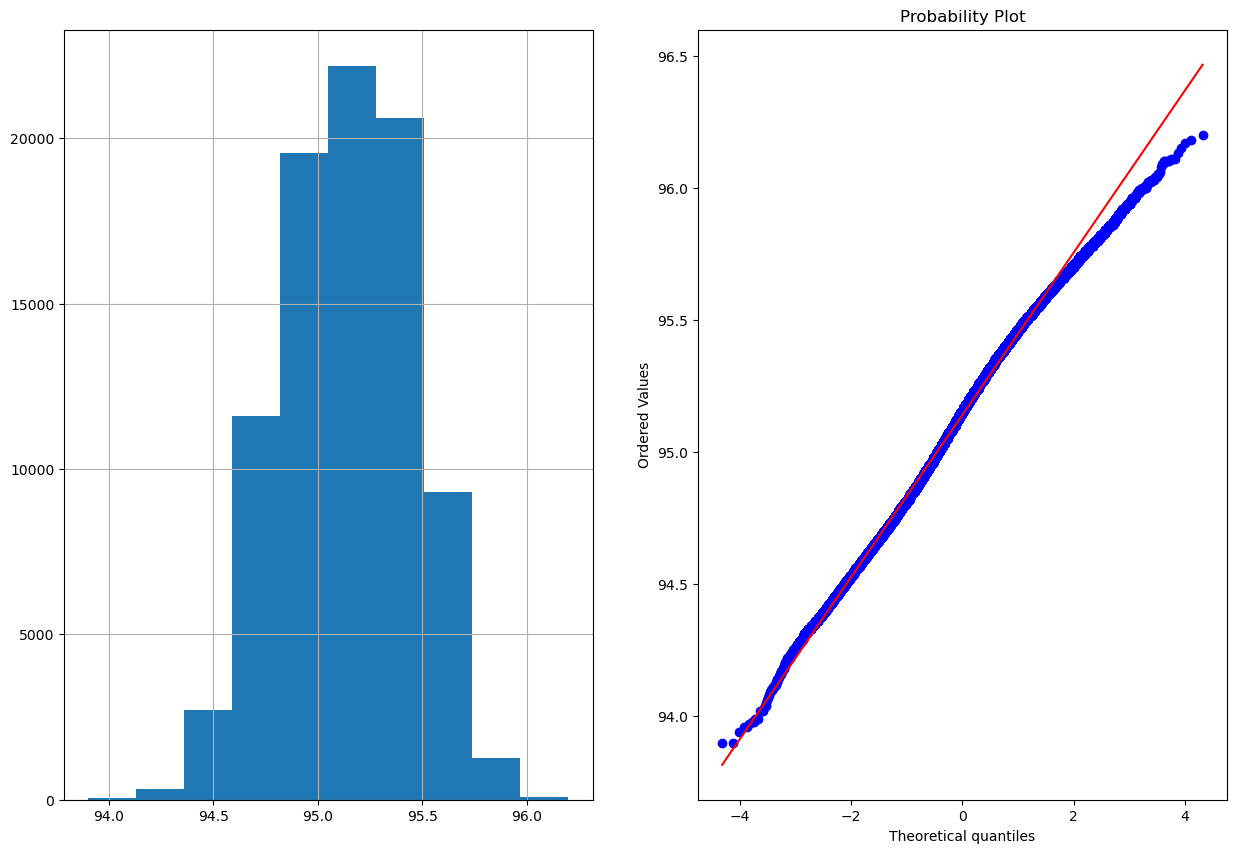

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       2.000e-01, 2.100e-01, 3.300e-01, 4.200e-01, 4.300e-01, 4.500e-01,
       5.000e-01, 4.600e-01, 8.000e-02, 7.000e-02, 6.000e-02, 9.000e-02,
       1.700e-01, 3.200e-01, 4.900e-01, 6.000e-01, 5.800e-01, 5.500e-01,
       4.700e-01, 3.400e-01, 1.100e-01, 1.000e-01, 9.600e-01, 3.500e-01,
       1.210e+00, 1.500e+00, 1.140e+00, 7.300e-01, 1.200e-01, 1.400e-01,
       3.700e-01, 6.900e-01, 6.600e-01, 3.100e-01, 2.500e-01, 1.300e-01,
       1.680e+00, 1.590e+00, 1.420e+00, 1.170e+00, 9.000e-01, 8.400e-01,
       8.600e-01, 3.000e-01, 4.400e-01, 8.300e-01, 9.200e-01, 8.800e-01,
       8.200e-01, 7.800e-01, 6.700e-01, 5.400e-01, 3.900e-01, 3.800e-01,
       9.500e-01, 1.150e+00, 1.730e+00, 2.330e+00, 3.270e+00, 4.730e+00,
       5.140e+00, 4.880e+00, 3.220e+00, 2.900e+00, 2.800e+00, 2.440e+00,
       1.860e+00, 1.450e+00, 1.020e+00, 7.600e-01, 6.800e-01, 7.100e-01,
       8.500e-01, 1.640e+00, 1.910e+00, 1.330e+00, 

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([1., 0.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,20.86,1.0
1,22.22,1.0
2,26.63,1.0
3,30.91,1.0
4,33.69,1.0
...,...,...
87667,20.94,1.0
87668,20.39,1.0
87669,20.01,1.0
87670,19.72,1.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,20.86,1.0,5
1,22.22,1.0,6
2,26.63,1.0,7
3,30.91,1.0,8
4,33.69,1.0,9
...,...,...,...
87667,20.94,1.0,0
87668,20.39,1.0,1
87669,20.01,1.0,2
87670,19.72,1.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,20.86,1.0,5,1
1,22.22,1.0,6,1
2,26.63,1.0,7,1
3,30.91,1.0,8,1
4,33.69,1.0,9,1
...,...,...,...,...
87667,20.94,1.0,0,1
87668,20.39,1.0,1,1
87669,20.01,1.0,2,1
87670,19.72,1.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,20.86,1.0,5,1,4
1,22.22,1.0,6,1,4
2,26.63,1.0,7,1,4
3,30.91,1.0,8,1,4
4,33.69,1.0,9,1,4
...,...,...,...,...,...
87667,20.94,1.0,0,1,4
87668,20.39,1.0,1,1,4
87669,20.01,1.0,2,1,4
87670,19.72,1.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,20.86,1.0,5,1,4,2011
1,22.22,1.0,6,1,4,2011
2,26.63,1.0,7,1,4,2011
3,30.91,1.0,8,1,4,2011
4,33.69,1.0,9,1,4,2011
...,...,...,...,...,...,...
87667,20.94,1.0,0,1,4,2021
87668,20.39,1.0,1,1,4,2021
87669,20.01,1.0,2,1,4,2021
87670,19.72,1.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,20.86,1.0,5,1,4,2011
1,22.22,1.0,6,1,4,2011
2,26.63,1.0,7,1,4,2011
3,30.91,1.0,8,1,4,2011
4,33.69,1.0,9,1,4,2011
...,...,...,...,...,...,...
87667,20.94,1.0,0,1,4,2021
87668,20.39,1.0,1,1,4,2021
87669,20.01,1.0,2,1,4,2021
87670,19.72,1.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([1., 0.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,20.86,1.0,5,1,4,2011,34.00
1,22.22,1.0,6,1,4,2011,31.38
2,26.63,1.0,7,1,4,2011,23.19
3,30.91,1.0,8,1,4,2011,14.75
4,33.69,1.0,9,1,4,2011,12.38
...,...,...,...,...,...,...,...
87667,20.94,1.0,0,1,4,2021,83.69
87668,20.39,1.0,1,1,4,2021,87.12
87669,20.01,1.0,2,1,4,2021,88.56
87670,19.72,1.0,3,1,4,2021,88.44


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,20.86,1.0,5,1,4,2011,34.00,3.93
1,22.22,1.0,6,1,4,2011,31.38,3.52
2,26.63,1.0,7,1,4,2011,23.19,3.55
3,30.91,1.0,8,1,4,2011,14.75,5.20
4,33.69,1.0,9,1,4,2011,12.38,5.25
...,...,...,...,...,...,...,...,...
87667,20.94,1.0,0,1,4,2021,83.69,4.07
87668,20.39,1.0,1,1,4,2021,87.12,3.67
87669,20.01,1.0,2,1,4,2021,88.56,3.39
87670,19.72,1.0,3,1,4,2021,88.44,3.17


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,20.86,1.0,5,1,4,2011,34.00,3.93,3.93
1,22.22,1.0,6,1,4,2011,31.38,3.52,3.52
2,26.63,1.0,7,1,4,2011,23.19,3.55,3.55
3,30.91,1.0,8,1,4,2011,14.75,5.20,5.20
4,33.69,1.0,9,1,4,2011,12.38,5.25,5.25
...,...,...,...,...,...,...,...,...,...
87667,20.94,1.0,0,1,4,2021,83.69,4.07,4.07
87668,20.39,1.0,1,1,4,2021,87.12,3.67,3.67
87669,20.01,1.0,2,1,4,2021,88.56,3.39,3.39
87670,19.72,1.0,3,1,4,2021,88.44,3.17,3.17


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

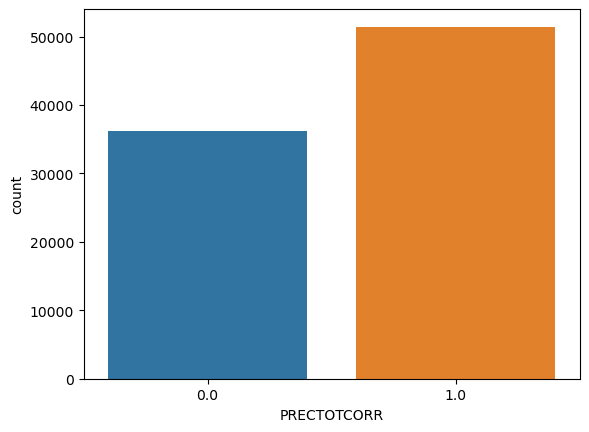

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("Satara-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,20.86,1.0,5,1,4,2011,34.00,3.93,3.93
1,22.22,1.0,6,1,4,2011,31.38,3.52,3.52
2,26.63,1.0,7,1,4,2011,23.19,3.55,3.55
3,30.91,1.0,8,1,4,2011,14.75,5.20,5.20
4,33.69,1.0,9,1,4,2011,12.38,5.25,5.25
...,...,...,...,...,...,...,...,...,...
87667,20.94,1.0,0,1,4,2021,83.69,4.07,4.07
87668,20.39,1.0,1,1,4,2021,87.12,3.67,3.67
87669,20.01,1.0,2,1,4,2021,88.56,3.39,3.39
87670,19.72,1.0,3,1,4,2021,88.44,3.17,3.17
